In [5]:
import warnings 
warnings.simplefilter('ignore')
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [12]:
df_score=pd.read_csv("Happines_Score.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Happines_Score.csv'

In [13]:


df_score.head()




NameError: name 'df_score' is not defined

In [7]:
df_score.columns

NameError: name 'df_score' is not defined

In [ ]:
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
df_score.shape

In [8]:
df_score.isnull().sum()

NameError: name 'df_score' is not defined

In [ ]:
df_score.info()

In [ ]:
df_score_New=df_score.drop(['Country','Region','Happiness Rank'],axis=1)

In [9]:
upper_triangel=np.tril(df_score_New.corr())
sns.heatmap(df_score_New.corr(),vmin=-1,vmax=1,annot=True,annot_kws={'size':10},cmap='gist_earth',mask=upper_triangel)
plt.show()


NameError: name 'df_score_New' is not defined

In [ ]:
corr_hmap=df_score_New.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True,cmap='gist_earth')
plt.show()

In [ ]:
sns.pairplot(df_score_New)
plt.show()

In [ ]:
sns.pairplot(df_score_New)
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(20,20)
df_score_New.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

In [ ]:
df_score_New.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20),notch=True)

In [ ]:
df_score_New.skew()

In [ ]:
# z Score Method:
z=np.abs(zscore(df_score_New))
threshold=3
np.where(z>3)
df_score_New1=df_score_New[(z<3).all(axis=1)]
df_score_New1

In [ ]:
# Percentage of Data Loss:
data_loss=(158-149)/158*100
data_loss

In [ ]:
x=df_score_New1.drop('Happiness Score',axis=1)# list of all Feature
y=df_score_New1['Happiness Score'] # Label

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
scale1=PowerTransformer(method='yeo-johnson')
x_scaled=pd.DataFrame(scale1.fit_transform(x),columns=x.columns)

In [ ]:
x_scaled

In [ ]:
#Creating the Training and Testing data sets:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75, random_state=42, shuffle=True)


In [ ]:
# Model Selection:
linear_model=LinearRegression()
svr_model=SVR(C=1.0,epsilon=0.2,kernel='poly',gamma='auto')
dtr_model=DecisionTreeRegressor(criterion='poisson',random_state=111)
rfr_model=RandomForestRegressor(max_depth=2,max_features="sqrt")
knr_model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')

In [ ]:
# Training the Models:
linear_model.fit(x_train,y_train)
svr_model.fit(x_train,y_train)
dtr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
knr_model.fit(x_train,y_train)

In [ ]:
KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [ ]:
#Prediction:
pred_linear=linear_model.predict(x_test)
pred_svr=svr_model.predict(x_test)
pred_dtr=dtr_model.predict(x_test)
pred_rfr=rfr_model.predict(x_test)
pred_knr=knr_model.predict(x_test)

In [ ]:
se_linaer=mean_squared_error(y_test,pred_linear)
se_svr=mean_squared_error(y_test,pred_svr)
se_dtr=mean_squared_error(y_test,pred_dtr)
se_rfr=mean_squared_error(y_test,pred_rfr)
se_knr=mean_squared_error(y_test,pred_knr)

rmse_linear=sqrt(se_linaer)
rmse_svr=sqrt(se_svr)
rmse_dtr=sqrt(se_dtr)
rmse_rfr=sqrt(se_rfr)
rmse_knr=sqrt(se_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

In [ ]:
#R2 Score for the model:

print(f"R2 Score for Linear Regression is:",r2_score(y_test,pred_linear,multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is:",r2_score(y_test,pred_svr,multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor  is:",r2_score(y_test,pred_dtr,multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor  is:",r2_score(y_test,pred_rfr,multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor  is:",r2_score(y_test,pred_knr,multioutput='variance_weighted')*100)

In [ ]:
#Hyper Parameter Tuning on the best ML Model:
Lr_Param={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}

In [ ]:
   
from sklearn.model_selection import GridSearchCV

In [ ]:
GSCV=GridSearchCV(LinearRegression(),Lr_Param,cv=5)

In [ ]:
GSCV.fit(x_train,y_train)

In [ ]:
GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False]})

In [ ]:
GSCV.best_params_

In [ ]:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [ ]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1, normalize=True)
CLassifer=Final_model.fit(x_train,y_train)
lr_pred=Final_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

In [ ]:
filename='FinalModel_Happiness.pkl'
pickle.dump(Final_model,open(fileame,'wb'))

In [11]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)*100
print(result)

NameError: name 'filename' is not defined

NameError: name 'y_test' is not defined

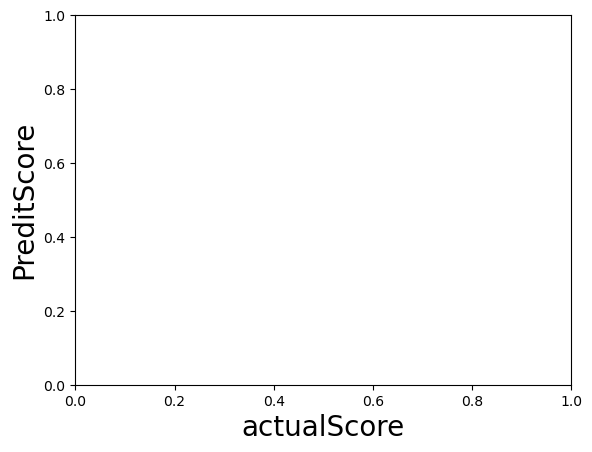

In [10]:
plt.xlabel('actualScore',fontsize=20)
plt.ylabel('PreditScore',fontsize=20)
plt.plot(y_test,lr_pred,color='blue',marker='+')
plt.show()